In [ ]:
# train y validate
# list images
# display
# classify
# save image list

In [33]:
import os
import matplotlib.pyplot as plt
# pip install pickle5
import pickle5 as pickle
# pip install Pillow
from PIL import Image
from time import sleep

Starting to process dataset "train"
Folder frames/train has 1377 files
processing file frames/train/IMG_1762.MOV_493.png


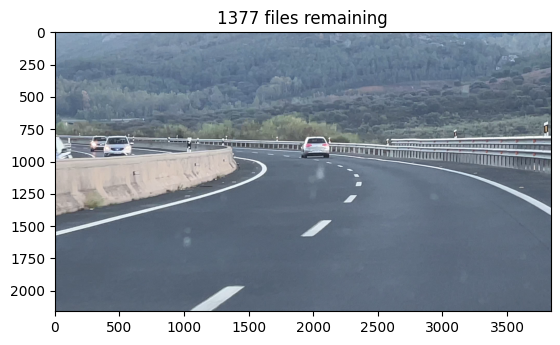

Has license plates: [enter],   No license plates: 1,    Back: 21
NO PLATES
processing file frames/train/IMG_1762.MOV_1450.png


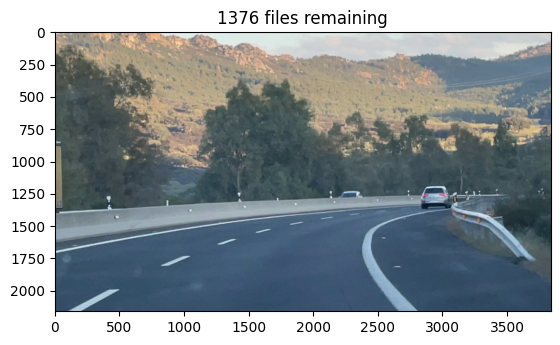

In [ ]:
datasets = ['train', 'validate']

for dataset in datasets:
    print('Starting to process dataset "{}"'.format(dataset))
    folder = 'data/frames/{}'.format(dataset)
    files = os.listdir(folder)
    len_files = len(files)
    print('Folder {} has {} files'.format(folder, len_files))
    useful = []
    processed = 0
    i = 0
    while i < len_files:
        # show image
        filepath = '{}/{}'.format(folder, files[i])
        print('processing file {}'.format(filepath))
        try:
            im = Image.open(filepath)
        except:
            # file unreadable
            print('.', end='')
            i += 1
            continue
        plt.title('{} files remaining'.format(len_files - i))
        plt.imshow(im)
        plt.show()

        # gest classification
        if files[i] in useful: # file seen before
            useful.remove(file)

        while True:
            sleep(0.2)
            key = input('Has license plates: [enter],   No license plates: 1,    Back: 2')
            if key == '':
                useful.append(file)
            else:
                try:
                    if int(key) == 2: # back
                        i -= 1
                        print('GOING BACK')
                        break
                    elif int(key) == 1:
                        print('NO PLATES')
                        i += 1
                        break # image does not have license plates
                except:
                    continue

            # save checkpoint
            if (processed%10 == 0) or (i == len(files)): # every 10 files and at the end
                pickle.dump(useful, open('data/{}_usefull.pkl'.format(dataset), 'wb'))

            i += 1
            processed += 1